In [1]:
#make the necessary imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.cross_validation import cross_val_score
from sklearn import model_selection

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.cluster import KMeans

C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load 'master.csv'

df_train = pd.read_csv('master.csv')

In [3]:
#Load 'test.csv'

df_test = pd.read_csv('test.csv')

### Exploratory Analysis of training data

In [4]:
# structure of your dataset? (shape)
df_train.shape

(344667, 15)

In [5]:
#main feature(s) in your dataset? (column names)
df_train.columns

Index(['Store_Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [6]:
df_test.shape

(76903, 15)

In [7]:
df_test.columns

Index(['Store_Dept', 'Weekly_Sales', 'Date', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [8]:
#features as Categorical or Continuous. (head/tail)
df_train.head(10)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1_1,3/12/10,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1_1,3/19/10,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1_1,3/26/10,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1_1,4/2/10,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1_1,4/9/10,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [9]:
df_train.tail(10)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
344657,45_98,2/24/12,544.34,False,42.86,3.739,9006.21,5786.94,2.00,4291.22,7626.46,190.006988,8.424,B,118221
344658,45_98,3/2/12,654.52,False,41.55,3.816,22832.38,2515.25,4.00,13317.88,2560.48,190.171493,8.424,B,118221
344659,45_98,3/9/12,871.34,False,45.52,3.848,11139.34,678.08,1.99,3267.21,4971.47,190.335997,8.424,B,118221
344660,45_98,3/16/12,747.50,False,50.56,3.862,5811.44,375.70,3.69,3444.05,2706.47,190.461896,8.424,B,118221
344661,45_98,3/23/12,550.98,False,59.45,3.900,6296.25,334.42,4.56,873.47,1201.57,190.536321,8.424,B,118221
344662,45_98,3/30/12,763.60,False,50.04,3.953,9866.15,206.18,3.25,1815.37,1561.56,190.610746,8.424,B,118221
344663,45_98,4/6/12,778.70,False,49.73,3.996,13450.45,NaN,26.59,3363.54,3962.01,190.685171,8.567,B,118221
344664,45_98,4/13/12,559.14,False,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,B,118221
344665,45_98,4/20/12,605.80,False,63.13,4.027,9210.90,2667.05,6.25,970.33,2568.22,190.813801,8.567,B,118221
344666,45_98,4/27/12,619.41,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,B,118221


In [10]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 15 columns):
Store_Dept      344667 non-null object
Date            344667 non-null object
Weekly_Sales    344667 non-null float64
IsHoliday       344667 non-null bool
Temperature     344667 non-null float64
Fuel_Price      344667 non-null float64
MarkDown1       74187 non-null float64
MarkDown2       66068 non-null float64
MarkDown3       68659 non-null float64
MarkDown4       66394 non-null float64
MarkDown5       74529 non-null float64
CPI             344667 non-null float64
Unemployment    344667 non-null float64
Type            344667 non-null object
Size            344667 non-null int64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 37.1+ MB
None


In [11]:
#statistical features (viz. mean, median, standard deviation) of these features?
df_train.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,74187.000000,66068.000000,68659.000000,66394.000000,74529.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,7377.990937,5520.011830,2812.494829,3867.350763,4841.675275,170.260421,8.119909,136807.198011
std,22859.611439,18.644742,0.454502,9695.184239,11806.737391,13457.720905,8176.212908,5046.201077,38.767201,1.865077,60944.571069
min,-4988.940000,-2.060000,2.472000,0.500000,-265.760000,-1.000000,0.460000,135.160000,126.064000,4.125000,34875.000000
25%,2100.335000,43.820000,2.843000,1842.420000,96.520000,5.900000,319.840000,1844.030000,131.940807,7.082000,93638.000000
50%,7638.860000,58.060000,3.263000,4879.040000,1053.980000,35.490000,1100.930000,3429.820000,182.238988,7.951000,140167.000000
75%,20179.490000,71.240000,3.669000,9006.210000,5524.490000,203.990000,3380.280000,5996.690000,211.406287,8.622000,202505.000000
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


In [12]:
#missing values in your dataset?
df_train.isna().sum()
#MarkDown1-5 are anonymized data related to promotional markdowns that Walmart is running.
#MarkDown data is only available after Nov 2011, and is not available for all stores all the time.

Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [13]:
 df_test.isna().sum()

Store_Dept          0
Weekly_Sales        0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         409
MarkDown2       31723
MarkDown3        8471
MarkDown4        8330
MarkDown5           0
CPI                 0
Unemployment        0
Type                0
Size                0
dtype: int64

Text(0,0.5,'Frequency')

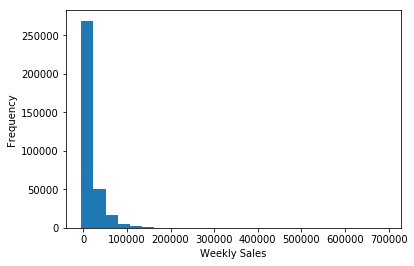

In [14]:
plt.hist(df_train['Weekly_Sales'],bins=25)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')

In [15]:
#Plotting each of the continous features
def scatter(df_train, column):
    plt.figure()
    plt.scatter(df_train[column] , df_train['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

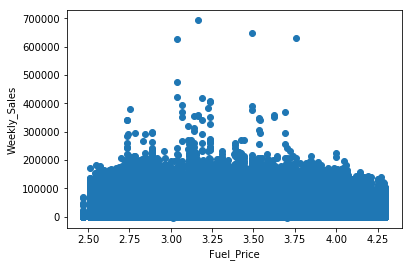

In [16]:
scatter(df_train, 'Fuel_Price')

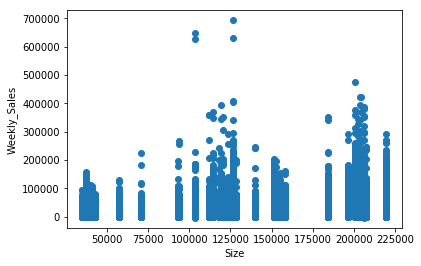

In [17]:
scatter(df_train, 'Size')

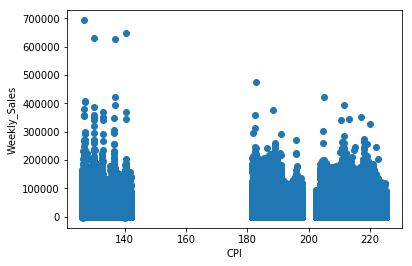

In [18]:
scatter(df_train, 'CPI')

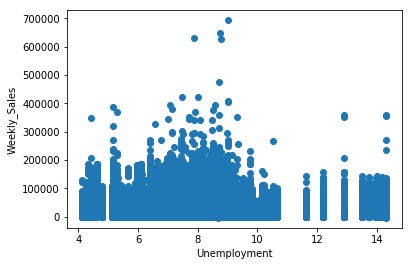

In [19]:
scatter(df_train, 'Unemployment')

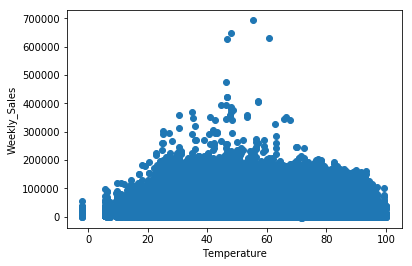

In [20]:
scatter(df_train, 'Temperature')

In [21]:
df_train.loc[df_train['Weekly_Sales'] >300000]
#From the plot it appears there are some outliers in the data. Digging deep, it seems that the end of November sees
#a lot of exceptionally large sales. The special day, looks like the Black Friday, also Christmas, appears here and there. 

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
24966,4_7,12/23/11,318422.01,False,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,A,205863
30463,4_72,11/26/10,381072.11,True,48.08,2.752,NaN,NaN,NaN,NaN,NaN,126.669267,7.127,A,205863
30515,4_72,11/25/11,385051.04,True,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,A,205863
46212,6_72,11/26/10,342578.65,True,65.79,2.735,NaN,NaN,NaN,NaN,NaN,213.267296,7.007,A,202505
46264,6_72,11/25/11,326866.60,True,62.78,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,6.551,A,202505
72392,10_7,12/24/10,406988.63,False,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,B,126512
72444,10_7,12/23/11,341308.00,False,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,B,126512
78094,10_72,11/26/10,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512
78098,10_72,12/24/10,404245.03,False,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,B,126512
78146,10_72,11/25/11,630999.19,True,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,B,126512


In [22]:
df_train.loc[df_train['Weekly_Sales'] >300000,"Date"].value_counts()

11/26/10    14
11/25/11    13
12/24/10     5
12/23/11     2
Name: Date, dtype: int64

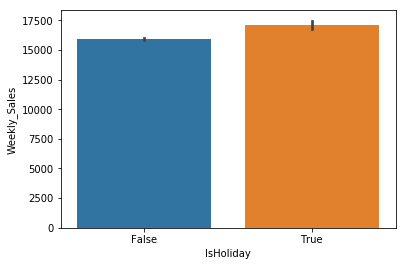

In [23]:
#bar plot for isHoliday
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=df_train)

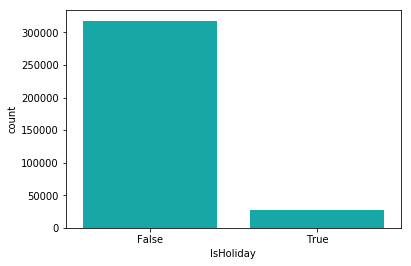

In [24]:
sns.countplot(x="IsHoliday",  data=df_train, color ="c");

In [25]:
#Count of records with different IsHoliday Values
print(df_train['IsHoliday'].value_counts())

False    317972
True      26695
Name: IsHoliday, dtype: int64


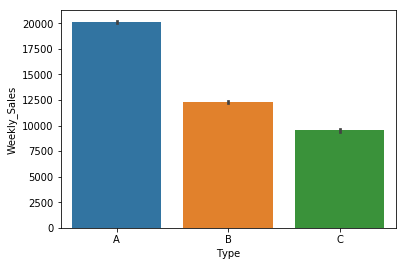

In [26]:
#bar plot for Type
sns.barplot(x='Type',y='Weekly_Sales',data=df_train)

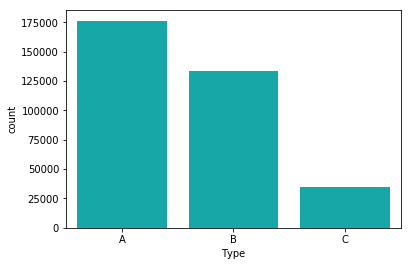

In [27]:
sns.countplot(x="Type",  data=df_train, color ="c");

In [28]:
print(df_train['Type'].value_counts())

A    176279
B    133752
C     34636
Name: Type, dtype: int64


In [29]:
# filing missing values with '0' in test and train
df_train['MarkDown1'] = df_train['MarkDown1'].fillna(0)
df_train['MarkDown2'] = df_train['MarkDown2'].fillna(0)
df_train['MarkDown3'] = df_train['MarkDown3'].fillna(0)
df_train['MarkDown4'] = df_train['MarkDown4'].fillna(0)
df_train['MarkDown5'] = df_train['MarkDown5'].fillna(0)

In [30]:
df_test['MarkDown1'] = df_test['MarkDown1'].fillna(0)
df_test['MarkDown2'] = df_test['MarkDown2'].fillna(0)
df_test['MarkDown3'] = df_test['MarkDown3'].fillna(0)
df_test['MarkDown4'] = df_test['MarkDown4'].fillna(0)

In [31]:
df_train.isna().sum()

Store_Dept      0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [32]:
df_test.isna().sum()

Store_Dept      0
Weekly_Sales    0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

[]

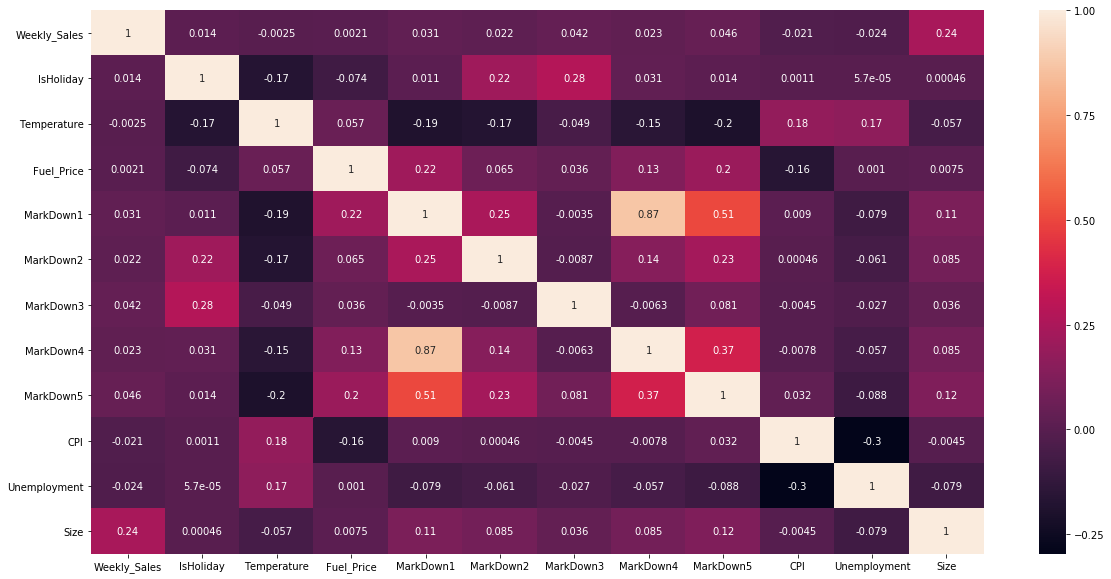

In [33]:
# Plotting correlation between all important features
corr = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.plot()
#The direction of the relationship is indicated by the sign of the coefficient;
#a + sign indicates a positive relationship and a — sign indicates a negative relationship.
#Markdown4 and Markdown1 seems to be highly correlated and Correlated Features should be deleted

### 1. Machine Learning Models - Supervised Learning (Regression) 

In [34]:
#Dummy variables for IsHoliday and Type
df_train['IsHoliday'] = 'IsHoliday_' + df_train['IsHoliday'].map(str)
df_train['Type'] = 'Type_' + df_train['Type'].map(str)
holiday_dummies = pd.get_dummies(df_train['IsHoliday'])
Type_dummies = pd.get_dummies(df_train['Type'])

In [35]:
df_train_lr = pd.concat([df_train,holiday_dummies,Type_dummies],axis=1)

In [36]:
df_train_lr.head(5)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,Type_A,151315,1,0,1,0,0
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,Type_A,151315,0,1,1,0,0
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,Type_A,151315,1,0,1,0,0
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,Type_A,151315,1,0,1,0,0
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,Type_A,151315,1,0,1,0,0


In [37]:
#Dummy variables for IsHoliday and Type in test data
df_test['IsHoliday'] = 'IsHoliday_' + df_test['IsHoliday'].map(str)
df_test['Type'] = 'Type_' + df_test['Type'].map(str)
holiday_dummies = pd.get_dummies(df_test['IsHoliday'])
Type_dummies = pd.get_dummies(df_test['Type'])

In [38]:
df_test_lr = pd.concat([df_test,holiday_dummies,Type_dummies],axis=1)

In [39]:
df_test_lr.head(5)

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C
0,1_1,17147.44,5/4/12,IsHoliday_False,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,221.671800,7.143,Type_A,151315,1,0,1,0,0
1,1_1,18164.20,5/11/12,IsHoliday_False,73.77,3.688,8351.40,0.0,10.52,2443.14,3127.88,221.725663,7.143,Type_A,151315,1,0,1,0,0
2,1_1,18517.79,5/18/12,IsHoliday_False,70.33,3.630,6154.14,0.0,45.11,1675.49,5508.18,221.742674,7.143,Type_A,151315,1,0,1,0,0
3,1_1,16963.55,5/25/12,IsHoliday_False,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,221.744944,7.143,Type_A,151315,1,0,1,0,0
4,1_1,16065.49,6/1/12,IsHoliday_False,77.95,3.501,6086.21,12.0,370.51,148.75,3690.85,221.747214,7.143,Type_A,151315,1,0,1,0,0


In [40]:
#Adding a new month, day and Year column
df_train_lr['Month'] = pd.to_datetime(df_train_lr['Date']).dt.month


In [41]:
df_train_lr['Day'] = pd.to_datetime(df_train_lr['Date']).dt.day

In [42]:
df_train_lr['Year'] = pd.to_datetime(df_train_lr['Date']).dt.year

In [43]:
df_test_lr['Month'] = pd.to_datetime(df_test_lr['Date']).dt.month
df_test_lr['Day'] = pd.to_datetime(df_test_lr['Date']).dt.day
df_test_lr['Year'] = pd.to_datetime(df_test_lr['Date']).dt.year

In [44]:

#Create new feature IsThanksgiving_Day as from the earlier analysis Thanksgiving day has exceptionally large sales. 
#data is from feb 2010 to April 2012 so has only two thanksgving days
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
df_train_lr['IsThanksgiving_Day'] = np.where((df_train_lr['Month']==11) & (df_train_lr['Day']==26) &(df_train_lr['Year']==2010) |(df_train_lr['Month']==11) & (df_train_lr['Day']==25) &(df_train_lr['Year']==2011), 'yes', 'no')

In [45]:
print(df_train_lr['IsThanksgiving_Day'].value_counts())

no     338708
yes      5959
Name: IsThanksgiving_Day, dtype: int64


In [46]:
df_train_lr.head(10)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Month,Day,Year,IsThanksgiving_Day
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,2,5,2010,no
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,...,151315,0,1,1,0,0,2,12,2010,no
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,2,19,2010,no
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,2,26,2010,no
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,3,5,2010,no
5,1_1,3/12/10,21043.39,IsHoliday_False,57.79,2.667,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,3,12,2010,no
6,1_1,3/19/10,22136.64,IsHoliday_False,54.58,2.720,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,3,19,2010,no
7,1_1,3/26/10,26229.21,IsHoliday_False,51.45,2.732,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,3,26,2010,no
8,1_1,4/2/10,57258.43,IsHoliday_False,62.27,2.719,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,4,2,2010,no
9,1_1,4/9/10,42960.91,IsHoliday_False,65.86,2.770,0.0,0.0,0.0,0.0,...,151315,1,0,1,0,0,4,9,2010,no


In [47]:

#Create new feature IsThanksgiving_Day as from the earlier analysis Thanksgiving day has exceptionally large sales. 
#data is from feb 2010 to April 2012 so has only two thanksgving days
df_test_lr['IsThanksgiving_Day'] = np.where((df_test_lr['Month']==11) & (df_test_lr['Day']==26) &(df_test_lr['Year']==2010) |(df_test_lr['Month']==11) & (df_test_lr['Day']==25) &(df_test_lr['Year']==2011), 'yes', 'no')

In [48]:
print(df_test_lr['IsThanksgiving_Day'].value_counts())
#test data does not have any thanksgiving date

no    76903
Name: IsThanksgiving_Day, dtype: int64


In [49]:
#Dummy variables for IsThanksgiving_Day
df_train_lr['IsThanksgiving_Day'] = 'IsThanksgiving_Day' + df_train_lr['IsThanksgiving_Day'].map(str)
IsThanksgiving_Day_dummies = pd.get_dummies(df_train_lr['IsThanksgiving_Day'])

In [50]:
df_train_lr = pd.concat([df_train_lr,IsThanksgiving_Day_dummies],axis=1)

In [51]:
df_train_lr.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,IsHoliday_True,Type_A,Type_B,Type_C,Month,Day,Year,IsThanksgiving_Day,IsThanksgiving_Dayno,IsThanksgiving_Dayyes
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,...,0,1,0,0,2,5,2010,IsThanksgiving_Dayno,1,0
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,...,1,1,0,0,2,12,2010,IsThanksgiving_Dayno,1,0
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,...,0,1,0,0,2,19,2010,IsThanksgiving_Dayno,1,0
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,...,0,1,0,0,2,26,2010,IsThanksgiving_Dayno,1,0
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,...,0,1,0,0,3,5,2010,IsThanksgiving_Dayno,1,0


In [52]:
#Dummy variables for IsThanksgiving_Day
df_test_lr['IsThanksgiving_Day'] = 'IsThanksgiving_Day' + df_test_lr['IsThanksgiving_Day'].map(str)
IsThanksgiving_Day_dummies = pd.get_dummies(df_test_lr['IsThanksgiving_Day'])

df_test_lr = pd.concat([df_test_lr,IsThanksgiving_Day_dummies],axis=1)

In [53]:
df_test_lr.head()

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Month,Day,Year,IsThanksgiving_Day,IsThanksgiving_Dayno
0,1_1,17147.44,5/4/12,IsHoliday_False,75.55,3.749,21290.13,0.0,69.89,4977.35,...,1,0,1,0,0,5,4,2012,IsThanksgiving_Dayno,1
1,1_1,18164.20,5/11/12,IsHoliday_False,73.77,3.688,8351.40,0.0,10.52,2443.14,...,1,0,1,0,0,5,11,2012,IsThanksgiving_Dayno,1
2,1_1,18517.79,5/18/12,IsHoliday_False,70.33,3.630,6154.14,0.0,45.11,1675.49,...,1,0,1,0,0,5,18,2012,IsThanksgiving_Dayno,1
3,1_1,16963.55,5/25/12,IsHoliday_False,77.22,3.561,4039.39,0.0,745.19,1429.96,...,1,0,1,0,0,5,25,2012,IsThanksgiving_Dayno,1
4,1_1,16065.49,6/1/12,IsHoliday_False,77.95,3.501,6086.21,12.0,370.51,148.75,...,1,0,1,0,0,6,1,2012,IsThanksgiving_Dayno,1


In [54]:
#dropping columns in training dataset
df_train_lr = df_train_lr.drop(columns=["Date", "IsHoliday", "MarkDown4", 'Type',"IsThanksgiving_Day","Day","Month","Year"])


In [55]:
#dropping columns in test dataset
df_test_lr = df_test_lr.drop(columns=["Date", "IsHoliday", "MarkDown4", 'Type',"IsThanksgiving_Day","Day","Month","Year"])

In [56]:
df_train_lr.head()

,Store_Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Size,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,IsThanksgiving_Dayno,IsThanksgiving_Dayyes
0,1_1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,1,0,0,1,0
1,1_1,46039.49,38.51,2.548,0.0,0.0,0.0,0.0,211.242170,8.106,151315,0,1,1,0,0,1,0
2,1_1,41595.55,39.93,2.514,0.0,0.0,0.0,0.0,211.289143,8.106,151315,1,0,1,0,0,1,0
3,1_1,19403.54,46.63,2.561,0.0,0.0,0.0,0.0,211.319643,8.106,151315,1,0,1,0,0,1,0
4,1_1,21827.90,46.50,2.625,0.0,0.0,0.0,0.0,211.350143,8.106,151315,1,0,1,0,0,1,0


In [57]:
df_train_lr.columns

Index(['Store_Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'IsHoliday_False', 'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C',
       'IsThanksgiving_Dayno', 'IsThanksgiving_Dayyes'],
      dtype='object')

In [58]:
#setting the X and y 
# for CV, converting to numpy array
X = np.array(df_train_lr.drop(columns=['Store_Dept','Weekly_Sales']).values)
y = np.array(df_train_lr['Weekly_Sales'].values)

In [59]:
#Split the data in 80-20 ratio, using this split ratio conduct your experiments and perform 10-fold cross validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
#Performace matrix - Root Mean Square Error

print("Linear Regression")
lr = LinearRegression()
# can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE

MSE_CV_scores = - cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error',n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))


Linear Regression
CV RMSE: 22245.67


In [61]:
# RMSE for Linear Regression = 22245.67

In [62]:
print("KNN")
knn = KNeighborsRegressor()
MSE_CV_scores = - cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error',n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE KNN: {:.2f}'.format(RMSE_CV))

KNN
CV RMSE KNN: 26151.60


In [63]:
#RMSE is something we want to minimize so RMSE for Linear regression is better

[]

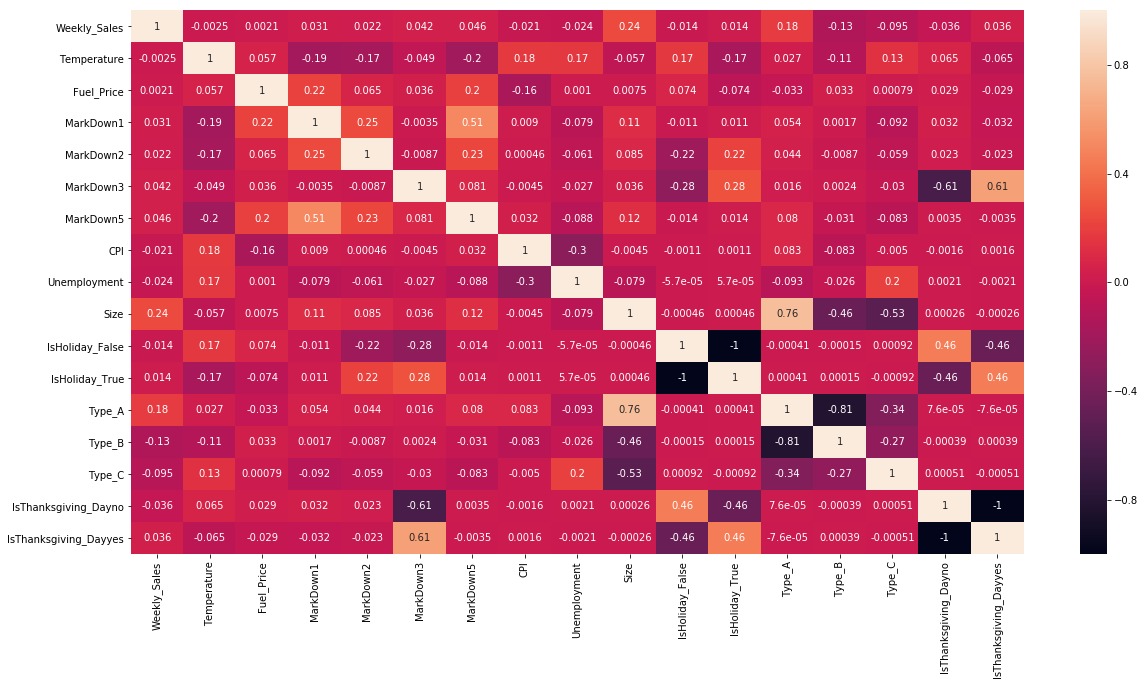

In [64]:
# Plotting correlation between all important features
corr = df_train_lr.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [65]:
#.80-1.0 “very strong”
#no features in this training dataset seems to have a strong correlation

In [66]:

#Performace matrix - neg_mean_absolute_error

print("Linear Regression")
lr = LinearRegression()
# can't use accuracy as our evaluation metric since that's only relevant for classification problems

MAE_CV_scores = - cross_val_score(lr, X, y, cv=10, scoring='neg_mean_absolute_error',n_jobs=-1) 

# Compute the 10-folds CV MAE
MAE_CV = (MAE_CV_scores.mean())

# Print MAE_CV
print('CV MAE: {:.2f}'.format(MAE_CV))

Linear Regression
CV MAE: 14602.90


In [67]:

#Performace matrix - neg_mean_absolute_error

print("KNN")
knn = KNeighborsRegressor()
# can't use accuracy as our evaluation metric since that's only relevant for classification problems

MAE_CV_scores_KNN = - cross_val_score(knn, X, y, cv=2, scoring='neg_mean_absolute_error',n_jobs=-1) 

# Compute the 10-folds CV MAE
MAE_CV_KNN = (MAE_CV_scores_KNN.mean())

# Print MAE_CV
print('CV MAE KNN: {:.2f}'.format(MAE_CV_KNN))

KNN
CV MAE KNN: 16945.23


In [68]:
#training the algorithm
#Fitted the model on Linear Regression as it had a better performance than KNN and was much faster. 
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
y_pred = lr.predict(X_test)

In [70]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

11394.203718774475
[ 2.92690684e+01 -5.67639234e+02  2.20168749e-03  5.59248965e-03
  4.60133486e-02  1.73135756e-01 -1.94845452e+01 -3.02609319e+02
  1.01880527e-01  5.27363710e+01 -5.27363710e+01 -1.51247806e+03
 -1.10056857e+03  2.61304664e+03 -2.75067511e+03  2.75067511e+03]


In [71]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)
#Observation – Going through the results of predicted “Weekly_Sales”, 
#the model seems to be performing well for higher Weekly_Sales.

,Actual,Predicted
0,35182.89,14738.061712
1,8150.86,4977.862599
2,1979.71,4977.862599
3,2362.85,10497.194455
4,3595.35,7257.172322
5,62.31,22323.993054
6,4059.47,23048.928013
7,39757.27,30856.529227
8,172.00,11694.527048
9,75.73,10832.245010


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14421.715081456512
Mean Squared Error: 483326415.28150755
Root Mean Squared Error: 21984.68592637856


### Running the Regression model on Test Data 

In [73]:
df_test_lr.columns

Index(['Store_Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'IsHoliday_False', 'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C',
       'IsThanksgiving_Dayno'],
      dtype='object')

In [74]:
#Add new coloumns IsThanksgiving_Dayyes and default to 0 as it was not created when dummy columns was created
df_test_lr['IsThanksgiving_Dayyes'] =0

In [75]:
df_test_lr.columns

Index(['Store_Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment', 'Size',
       'IsHoliday_False', 'IsHoliday_True', 'Type_A', 'Type_B', 'Type_C',
       'IsThanksgiving_Dayno', 'IsThanksgiving_Dayyes'],
      dtype='object')

In [76]:
df_test_lr.head(10)

,Store_Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Size,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,IsThanksgiving_Dayno,IsThanksgiving_Dayyes
0,1_1,17147.44,75.55,3.749,21290.13,0.00,69.89,3261.04,221.671800,7.143,151315,1,0,1,0,0,1,0
1,1_1,18164.20,73.77,3.688,8351.40,0.00,10.52,3127.88,221.725663,7.143,151315,1,0,1,0,0,1,0
2,1_1,18517.79,70.33,3.630,6154.14,0.00,45.11,5508.18,221.742674,7.143,151315,1,0,1,0,0,1,0
3,1_1,16963.55,77.22,3.561,4039.39,0.00,745.19,3631.13,221.744944,7.143,151315,1,0,1,0,0,1,0
4,1_1,16065.49,77.95,3.501,6086.21,12.00,370.51,3690.85,221.747214,7.143,151315,1,0,1,0,0,1,0
5,1_1,17666.00,78.30,3.452,8813.81,116.80,64.55,7161.91,221.749484,7.143,151315,1,0,1,0,0,1,0
6,1_1,17558.82,79.35,3.393,5621.99,109.60,0.25,3083.26,221.762642,7.143,151315,1,0,1,0,0,1,0
7,1_1,16633.41,78.39,3.346,8624.56,171.25,3.05,7063.68,221.803021,7.143,151315,1,0,1,0,0,1,0
8,1_1,15722.82,84.88,3.286,3965.73,161.60,0.00,4212.97,221.843400,7.143,151315,1,0,1,0,0,1,0
9,1_1,17823.37,81.57,3.227,12218.76,94.40,192.83,6149.04,221.883779,6.908,151315,1,0,1,0,0,1,0


In [77]:
#setting the X and y 
# for CV, converting to numpy array
X1 = np.array(df_test_lr.drop(columns=['Store_Dept','Weekly_Sales']).values)
y1 = np.array(df_test_lr['Weekly_Sales'].values)

In [78]:
y1_pred = lr.predict(X1)

In [79]:
df = pd.DataFrame({'Actual': y1.flatten(), 'Predicted': y1_pred.flatten()})
df.head(10)

,Actual,Predicted
0,17147.44,16817.017617
1,18164.20,16744.221558
2,18517.79,17084.996553
3,16963.55,17028.355847
4,16065.49,17081.409347
5,17666.00,17712.901383
6,17558.82,17060.681772
7,16633.41,17754.713106
8,15722.82,17473.929522
9,17823.37,17842.736521


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1, y1_pred)))

Mean Absolute Error: 14772.722359151898
Mean Squared Error: 454410813.3535282
Root Mean Squared Error: 21316.913785853903


### 2. Machine Learning Models - Supervised Learning (Classification)

In [81]:
df_train.head(12)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,Type_A,151315
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,Type_A,151315
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,Type_A,151315
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,Type_A,151315
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,Type_A,151315
5,1_1,3/12/10,21043.39,IsHoliday_False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,Type_A,151315
6,1_1,3/19/10,22136.64,IsHoliday_False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,Type_A,151315
7,1_1,3/26/10,26229.21,IsHoliday_False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,Type_A,151315
8,1_1,4/2/10,57258.43,IsHoliday_False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,Type_A,151315
9,1_1,4/9/10,42960.91,IsHoliday_False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,Type_A,151315


In [82]:
df_test.head(10)

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,17147.44,5/4/12,IsHoliday_False,75.55,3.749,21290.13,0.00,69.89,4977.35,3261.04,221.671800,7.143,Type_A,151315
1,1_1,18164.20,5/11/12,IsHoliday_False,73.77,3.688,8351.40,0.00,10.52,2443.14,3127.88,221.725663,7.143,Type_A,151315
2,1_1,18517.79,5/18/12,IsHoliday_False,70.33,3.630,6154.14,0.00,45.11,1675.49,5508.18,221.742674,7.143,Type_A,151315
3,1_1,16963.55,5/25/12,IsHoliday_False,77.22,3.561,4039.39,0.00,745.19,1429.96,3631.13,221.744944,7.143,Type_A,151315
4,1_1,16065.49,6/1/12,IsHoliday_False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,Type_A,151315
5,1_1,17666.00,6/8/12,IsHoliday_False,78.30,3.452,8813.81,116.80,64.55,2652.04,7161.91,221.749484,7.143,Type_A,151315
6,1_1,17558.82,6/15/12,IsHoliday_False,79.35,3.393,5621.99,109.60,0.25,2420.28,3083.26,221.762642,7.143,Type_A,151315
7,1_1,16633.41,6/22/12,IsHoliday_False,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.803021,7.143,Type_A,151315
8,1_1,15722.82,6/29/12,IsHoliday_False,84.88,3.286,3965.73,161.60,0.00,435.99,4212.97,221.843400,7.143,Type_A,151315
9,1_1,17823.37,7/6/12,IsHoliday_False,81.57,3.227,12218.76,94.40,192.83,4066.01,6149.04,221.883779,6.908,Type_A,151315


In [83]:
df_train_dt =df_train.copy()

In [84]:
df_test_dt =df_test.copy()

In [85]:
df_train_dt['Month'] = pd.to_datetime(df_train_dt['Date']).dt.month
df_train_dt['Day'] = pd.to_datetime(df_train_dt['Date']).dt.day
df_train_dt['Year'] = pd.to_datetime(df_train_dt['Date']).dt.year

In [86]:
df_train_dt.head(12)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Day,Year
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,Type_A,151315,2,5,2010
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,Type_A,151315,2,12,2010
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,Type_A,151315,2,19,2010
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,Type_A,151315,2,26,2010
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,Type_A,151315,3,5,2010
5,1_1,3/12/10,21043.39,IsHoliday_False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,Type_A,151315,3,12,2010
6,1_1,3/19/10,22136.64,IsHoliday_False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,Type_A,151315,3,19,2010
7,1_1,3/26/10,26229.21,IsHoliday_False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,Type_A,151315,3,26,2010
8,1_1,4/2/10,57258.43,IsHoliday_False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,Type_A,151315,4,2,2010
9,1_1,4/9/10,42960.91,IsHoliday_False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,Type_A,151315,4,9,2010


In [87]:
df_test_dt['Month'] = pd.to_datetime(df_test_dt['Date']).dt.month
df_test_dt['Day'] = pd.to_datetime(df_test_dt['Date']).dt.day
df_test_dt['Year'] = pd.to_datetime(df_test_dt['Date']).dt.year

In [88]:
df_test_dt.head(12)

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Day,Year
0,1_1,17147.44,5/4/12,IsHoliday_False,75.55,3.749,21290.13,0.00,69.89,4977.35,3261.04,221.671800,7.143,Type_A,151315,5,4,2012
1,1_1,18164.20,5/11/12,IsHoliday_False,73.77,3.688,8351.40,0.00,10.52,2443.14,3127.88,221.725663,7.143,Type_A,151315,5,11,2012
2,1_1,18517.79,5/18/12,IsHoliday_False,70.33,3.630,6154.14,0.00,45.11,1675.49,5508.18,221.742674,7.143,Type_A,151315,5,18,2012
3,1_1,16963.55,5/25/12,IsHoliday_False,77.22,3.561,4039.39,0.00,745.19,1429.96,3631.13,221.744944,7.143,Type_A,151315,5,25,2012
4,1_1,16065.49,6/1/12,IsHoliday_False,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,Type_A,151315,6,1,2012
5,1_1,17666.00,6/8/12,IsHoliday_False,78.30,3.452,8813.81,116.80,64.55,2652.04,7161.91,221.749484,7.143,Type_A,151315,6,8,2012
6,1_1,17558.82,6/15/12,IsHoliday_False,79.35,3.393,5621.99,109.60,0.25,2420.28,3083.26,221.762642,7.143,Type_A,151315,6,15,2012
7,1_1,16633.41,6/22/12,IsHoliday_False,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.803021,7.143,Type_A,151315,6,22,2012
8,1_1,15722.82,6/29/12,IsHoliday_False,84.88,3.286,3965.73,161.60,0.00,435.99,4212.97,221.843400,7.143,Type_A,151315,6,29,2012
9,1_1,17823.37,7/6/12,IsHoliday_False,81.57,3.227,12218.76,94.40,192.83,4066.01,6149.04,221.883779,6.908,Type_A,151315,7,6,2012


In [89]:

#Create new feature IsThanksgiving_Day as from the earlier analysis Thanksgiving day has exceptionally large sales. 
#data is from feb 2010 to April 2012 so has only two thanksgving days
df_train_dt['IsThanksgiving_Day'] = np.where((df_train_dt['Month']==11) & (df_train_dt['Day']==26) &(df_train_dt['Year']==2010) |(df_train_dt['Month']==11) & (df_train_dt['Day']==25) &(df_train_dt['Year']==2011), 'yes', 'no')

In [90]:
df_train_dt.head(12)

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Day,Year,IsThanksgiving_Day
0,1_1,2/5/10,24924.50,IsHoliday_False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,Type_A,151315,2,5,2010,no
1,1_1,2/12/10,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,Type_A,151315,2,12,2010,no
2,1_1,2/19/10,41595.55,IsHoliday_False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,Type_A,151315,2,19,2010,no
3,1_1,2/26/10,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,Type_A,151315,2,26,2010,no
4,1_1,3/5/10,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,Type_A,151315,3,5,2010,no
5,1_1,3/12/10,21043.39,IsHoliday_False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,Type_A,151315,3,12,2010,no
6,1_1,3/19/10,22136.64,IsHoliday_False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,Type_A,151315,3,19,2010,no
7,1_1,3/26/10,26229.21,IsHoliday_False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,Type_A,151315,3,26,2010,no
8,1_1,4/2/10,57258.43,IsHoliday_False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,Type_A,151315,4,2,2010,no
9,1_1,4/9/10,42960.91,IsHoliday_False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,Type_A,151315,4,9,2010,no


In [91]:
print(df_train_dt['IsThanksgiving_Day'].value_counts())

no     338708
yes      5959
Name: IsThanksgiving_Day, dtype: int64


In [92]:

#Create new feature IsThanksgiving_Day as from the earlier analysis Thanksgiving day has exceptionally large sales. 
#data is from feb 2010 to April 2012 so has only two thanksgving days
df_test_dt['IsThanksgiving_Day'] = np.where((df_test_dt['Month']==11) & (df_test_dt['Day']==26) &(df_test_dt['Year']==2010) |(df_test_dt['Month']==11) & (df_test_dt['Day']==25) &(df_test_dt['Year']==2011), 'yes', 'no')

In [93]:
print(df_test_dt['IsThanksgiving_Day'].value_counts())

no    76903
Name: IsThanksgiving_Day, dtype: int64


In [94]:
print(df_train_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 19 columns):
Store_Dept            344667 non-null object
Date                  344667 non-null object
Weekly_Sales          344667 non-null float64
IsHoliday             344667 non-null object
Temperature           344667 non-null float64
Fuel_Price            344667 non-null float64
MarkDown1             344667 non-null float64
MarkDown2             344667 non-null float64
MarkDown3             344667 non-null float64
MarkDown4             344667 non-null float64
MarkDown5             344667 non-null float64
CPI                   344667 non-null float64
Unemployment          344667 non-null float64
Type                  344667 non-null object
Size                  344667 non-null int64
Month                 344667 non-null int64
Day                   344667 non-null int64
Year                  344667 non-null int64
IsThanksgiving_Day    344667 non-null object
dtypes: float64(10), int64(4

In [95]:
#dropping columns in training dataset
df_train_dt = df_train_dt.drop(columns=["Date", "Store_Dept"])

In [96]:
#dropping columns in test dataset
df_test_dt = df_test_dt.drop(columns=["Date", "Store_Dept"])

In [97]:
print(df_train_dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344667 entries, 0 to 344666
Data columns (total 17 columns):
Weekly_Sales          344667 non-null float64
IsHoliday             344667 non-null object
Temperature           344667 non-null float64
Fuel_Price            344667 non-null float64
MarkDown1             344667 non-null float64
MarkDown2             344667 non-null float64
MarkDown3             344667 non-null float64
MarkDown4             344667 non-null float64
MarkDown5             344667 non-null float64
CPI                   344667 non-null float64
Unemployment          344667 non-null float64
Type                  344667 non-null object
Size                  344667 non-null int64
Month                 344667 non-null int64
Day                   344667 non-null int64
Year                  344667 non-null int64
IsThanksgiving_Day    344667 non-null object
dtypes: float64(10), int64(4), object(3)
memory usage: 44.7+ MB
None


In [98]:
#Type is the target variable.

In [99]:
le = preprocessing.LabelEncoder()

In [100]:
#Transforming categorical texts values to 0 and 1
df_train_dt['IsHoliday'] = le.fit_transform(df_train_dt['IsHoliday'])

In [101]:
df_train_dt['IsThanksgiving_Day'] = le.fit_transform(df_train_dt['IsThanksgiving_Day'])

In [102]:
df_train_dt['Type'] = le.fit_transform(df_train_dt['Type'])

In [103]:
df_train_dt.head(12)
#0 - TypeA
#1 - Type B
#2- Type C

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Day,Year,IsThanksgiving_Day
0,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2,5,2010,0
1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2,12,2010,0
2,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2,19,2010,0
3,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2,26,2010,0
4,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,3,5,2010,0
5,21043.39,0,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,0,151315,3,12,2010,0
6,22136.64,0,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,0,151315,3,19,2010,0
7,26229.21,0,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,0,151315,3,26,2010,0
8,57258.43,0,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,0,151315,4,2,2010,0
9,42960.91,0,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,0,151315,4,9,2010,0


In [104]:
print(df_train_dt['Type'].value_counts())

0    176279
1    133752
2     34636
Name: Type, dtype: int64


In [105]:
df_test_dt['IsHoliday'] = le.fit_transform(df_test_dt['IsHoliday'])
df_test_dt['IsThanksgiving_Day'] = le.fit_transform(df_test_dt['IsThanksgiving_Day'])

In [106]:
df_test_dt['Type'] = le.fit_transform(df_test_dt['Type'])

In [107]:
df_test_dt.head(12)

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Day,Year,IsThanksgiving_Day
0,17147.44,0,75.55,3.749,21290.13,0.00,69.89,4977.35,3261.04,221.671800,7.143,0,151315,5,4,2012,0
1,18164.20,0,73.77,3.688,8351.40,0.00,10.52,2443.14,3127.88,221.725663,7.143,0,151315,5,11,2012,0
2,18517.79,0,70.33,3.630,6154.14,0.00,45.11,1675.49,5508.18,221.742674,7.143,0,151315,5,18,2012,0
3,16963.55,0,77.22,3.561,4039.39,0.00,745.19,1429.96,3631.13,221.744944,7.143,0,151315,5,25,2012,0
4,16065.49,0,77.95,3.501,6086.21,12.00,370.51,148.75,3690.85,221.747214,7.143,0,151315,6,1,2012,0
5,17666.00,0,78.30,3.452,8813.81,116.80,64.55,2652.04,7161.91,221.749484,7.143,0,151315,6,8,2012,0
6,17558.82,0,79.35,3.393,5621.99,109.60,0.25,2420.28,3083.26,221.762642,7.143,0,151315,6,15,2012,0
7,16633.41,0,78.39,3.346,8624.56,171.25,3.05,2524.07,7063.68,221.803021,7.143,0,151315,6,22,2012,0
8,15722.82,0,84.88,3.286,3965.73,161.60,0.00,435.99,4212.97,221.843400,7.143,0,151315,6,29,2012,0
9,17823.37,0,81.57,3.227,12218.76,94.40,192.83,4066.01,6149.04,221.883779,6.908,0,151315,7,6,2012,0


In [108]:
# for CV, converting to numpy array
X = np.array(df_train_dt.drop(columns=['Type']).values)
y = np.array(df_train_dt['Type'].values)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [110]:
# DecisionTree Classifier
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
precision = cross_val_score(clf, X, y, cv=10,scoring="precision_weighted")
recall = cross_val_score(clf, X, y, cv=10,scoring="recall_weighted")
f1 = cross_val_score(clf, X, y, cv=10,scoring="f1_weighted")
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")
print("Recall: " + str(round(100*recall.mean(), 2)) + "%")
print("F1-Score: " + str(round(100*f1.mean(), 2)) + "%")


Decision Tree Classifier
Precision: 96.64%
Recall: 94.23%
F1-Score: 94.31%


In [111]:
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [112]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[35200     0    87]
 [    0 26784     0]
 [   92     0  6771]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     35287
          1       1.00      1.00      1.00     26784
          2       0.99      0.99      0.99      6863

avg / total       1.00      1.00      1.00     68934



In [113]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
# algorithm was able to achieve a classification precision of 97% on the held out set. Only 178 samples were misclassified. 

Misclassified samples: 179


In [114]:
#Naive-Bayes Classifier
print("Naive-Bayes Classifier")
nb = BernoulliNB()
precision_nb = cross_val_score(nb, X, y, cv=10,scoring="precision_weighted")
recall_nb = cross_val_score(nb, X, y, cv=10,scoring="recall_weighted")
f1_nb = cross_val_score(nb, X, y, cv=10,scoring="f1_weighted")
print("Precision: " + str(round(100*precision_nb.mean(), 2)) + "%")
print("Recall: " + str(round(100*recall_nb.mean(), 2)) + "%")
print("F1-Score: " + str(round(100*f1_nb.mean(), 2)) + "%")

Naive-Bayes Classifier


C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages

Precision: 45.54%
Recall: 51.19%
F1-Score: 34.93%


C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
nb = nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[35211    76     0]
 [26664   120     0]
 [ 6843    20     0]]
             precision    recall  f1-score   support

          0       0.51      1.00      0.68     35287
          1       0.56      0.00      0.01     26784
          2       0.00      0.00      0.00      6863

avg / total       0.48      0.51      0.35     68934



C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
#KNN Classifier
print("KNN Classifier")
knn = KNeighborsClassifier()
precision_knn = cross_val_score(knn, X, y, cv=10,scoring="precision_weighted")
recall_knn = cross_val_score(knn, X, y, cv=10,scoring="recall_weighted")
f1_knn = cross_val_score(knn, X, y, cv=10,scoring="f1_weighted")
print("Precision: " + str(round(100*precision_knn.mean(), 2)) + "%")
print("Recall: " + str(round(100*recall_knn.mean(), 2)) + "%")
print("F1-Score: " + str(round(100*f1_knn.mean(), 2)) + "%")

KNN Classifier
Precision: 89.15%
Recall: 86.04%
F1-Score: 86.44%


### Finding Important Features with Random Forests

In [117]:
X_rf = df_train_dt.drop(columns=['Type'])
y_rf = df_train_dt[['Type']]
#order is important, 30% test with random selection
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=1)

In [118]:
# Variable importance
rf = RandomForestClassifier()  
rf.fit(X_train_rf,y_train_rf)
print ("Features sorted by their score:" )
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_rf), reverse=True) )

C:\Users\Iptisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Features sorted by their score:
[(0.7526, 'Size'), (0.0695, 'Unemployment'), (0.0563, 'CPI'), (0.0365, 'Weekly_Sales'), (0.0215, 'Fuel_Price'), (0.0183, 'Temperature'), (0.0111, 'MarkDown5'), (0.0077, 'MarkDown4'), (0.0065, 'MarkDown1'), (0.0055, 'MarkDown3'), (0.0049, 'Month'), (0.0031, 'Year'), (0.0031, 'MarkDown2'), (0.0031, 'Day'), (0.0003, 'IsThanksgiving_Day'), (0.0002, 'IsHoliday')]


In [119]:
#from the above output I can say that Size is the most important feature for classification followed by Unemployment.
#IsThanksgiving_Day is of the  least importance

### Running the Decision Tree model on Test Data

In [120]:
# for CV, converting to numpy array
X2 = np.array(df_test_dt.drop(columns=['Type']).values)
y2 = np.array(df_test_dt['Type'].values)

In [121]:
y_pred = clf.predict(X2)

In [122]:
df = pd.DataFrame({'Actual': y2.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [123]:
print(confusion_matrix(y2, y_pred))
print(classification_report(y2, y_pred))

[[38098     0  1101]
 [    0 29743     0]
 [ 1103     0  6858]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97     39199
          1       1.00      1.00      1.00     29743
          2       0.86      0.86      0.86      7961

avg / total       0.97      0.97      0.97     76903



### 3. Machine Learning Models - Unsupervised Learning (Clustering)

In [124]:
#Data is already cleaned and set to run the clustering
cl = df_train_dt.copy()

In [125]:
#Dropping the IsHoliday column and will to cluster the data into 2  - is a holiday or not a holiday
cl = cl.drop(columns=['Type'])

In [126]:
cl.head(10)

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month,Day,Year,IsThanksgiving_Day
0,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,2,5,2010,0
1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,2,12,2010,0
2,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,2,19,2010,0
3,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,2,26,2010,0
4,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,3,5,2010,0
5,21043.39,0,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,151315,3,12,2010,0
6,22136.64,0,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,151315,3,19,2010,0
7,26229.21,0,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,151315,3,26,2010,0
8,57258.43,0,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,151315,4,2,2010,0
9,42960.91,0,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,151315,4,9,2010,0


In [127]:
#K means Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(cl, 3)
kmeans = pd.DataFrame(clust_labels)
cl.insert((cl.shape[1]),'kmeans',kmeans)

Text(0.5,0,'Size')

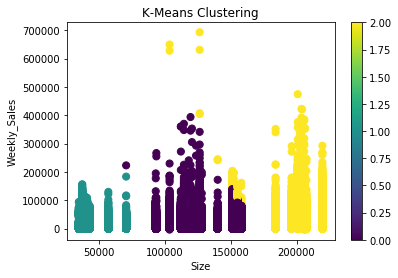

In [128]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(cl['Size'],cl['Weekly_Sales'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')

plt.colorbar(scatter)
plt.ylabel('Weekly_Sales')
plt.xlabel('Size')

Text(0.5,0,'Month')

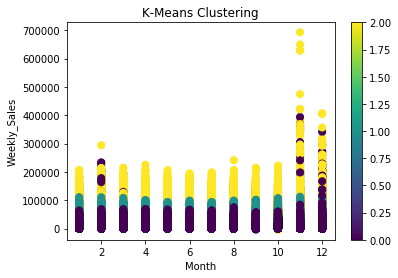

In [129]:
#Plot the clusters obtained using k means
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
scatter1 = ax1.scatter(cl['Month'],cl['Weekly_Sales'],
                     c=kmeans[0],s=50)
ax1.set_title('K-Means Clustering')

plt.colorbar(scatter1)
plt.ylabel('Weekly_Sales')
plt.xlabel('Month')